In [11]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [12]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [20]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [21]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [22]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [228]:
# content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
# style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

# style_path = "./data/doodles/2145.jpg"
content_path = "./data/doodles/5325.jpg"
style_path = "./data/styles/psychadelic_1.jpeg"
# content_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

# final_path = "./data/styles/bayc_1.png"
# content_path = "./data/styles/noise_2.jpeg"
# content_path = "./data/styles/bayc_1.png"
# content_path = "./data/styles/bayc_1.png"
# style_path = "./data/styles/pollock_1.jpeg"
# style_path = "./data/styles/bayc_1.png"

# style_path = "./data/doodles/2145.jpg"
# content_path = "./data/styles/bayc_1.png"

# style_path = "./data/styles/monet_waterlilies.jpg"
# style_path = "./data/styles/vangogh_starrynight.jpeg"



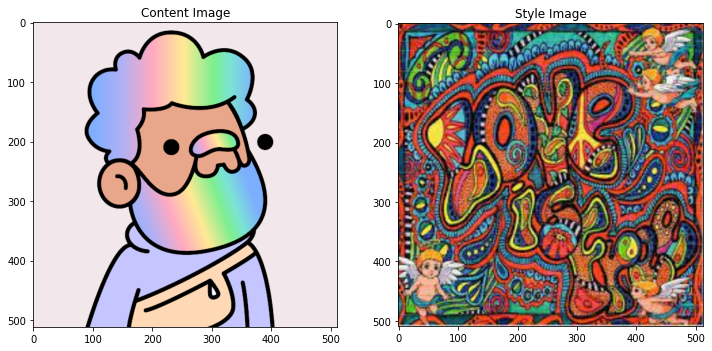

In [229]:
content_image = load_img(content_path)
style_image = load_img(style_path)
final_image = load_img(final_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

# plt.subplot(1, 3, 3)
# imshow(final_image, 'Final Image')

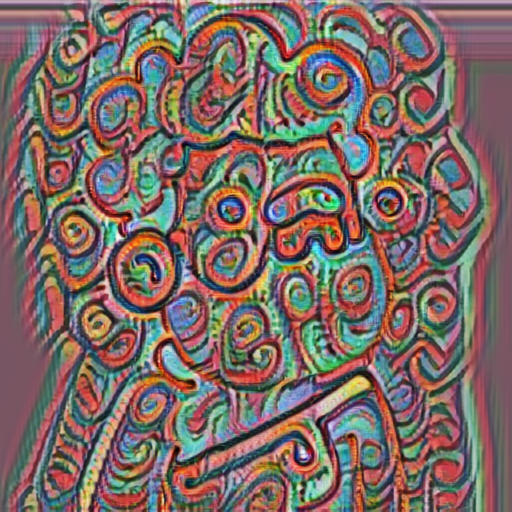

In [230]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
# stylized_image = hub_model(tf.constant(content_image), tf.constant(stylized_image))[0]
# stylized_image = hub_model(tf.constant(content_image), tf.constant(stylized_image))[0]
# stylized_image = hub_model(tf.constant(content_image), tf.constant(stylized_image))[0]
# stylized_image = hub_model(tf.constant(content_image), tf.constant(stylized_image))[0]
# stylized_image = hub_model(tf.constant(stylized_image), tf.constant(style_image))[0]


# stylized_image = hub_model(tf.constant(stylized_image), tf.constant(style_image))[0]
# stylized_image = hub_model(tf.constant(content_image), tf.constant(stylized_image))[0]

# stylized_image = hub_model(tf.constant(content_image), tf.constant(stylized_image))[0]
# stylized_image = hub_model(tf.constant(final_image), tf.constant(stylized_image))[0]

tensor_to_image(stylized_image)